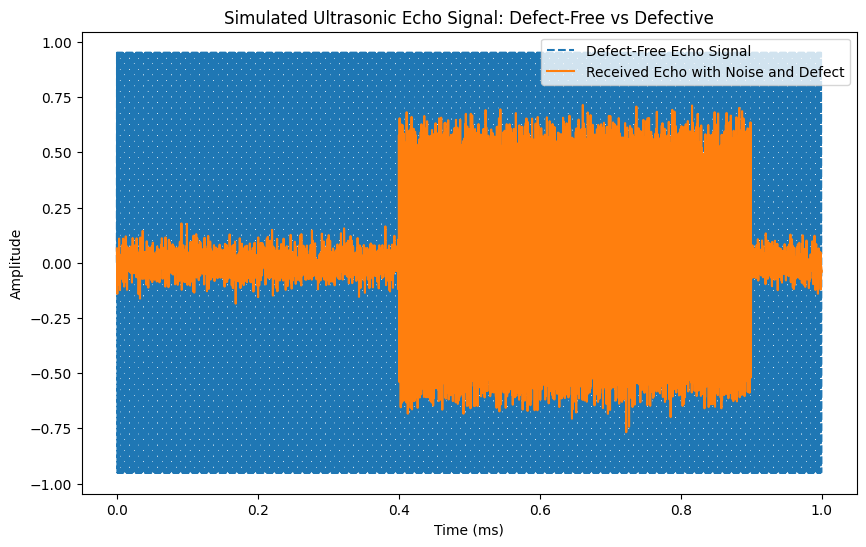

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
sampling_rate = 5e6  # 5 MHz sampling rate
duration = 1e-3  # 1 millisecond
t = np.arange(0, duration, 1/sampling_rate)  # Time array

# Simulate a defect-free sine wave pulse (transmitted signal)
frequency = 1e6  # 1 MHz frequency
pulse = np.sin(2 * np.pi * frequency * t)

# Create an echo signal with a delay (defective signal)
echo_delay = int(0.0004 * sampling_rate)  # Delay of 0.4 ms
echo_amplitude = 0.6  # Attenuated echo
echo_signal = np.zeros_like(t)
echo_signal[echo_delay:echo_delay+len(pulse)//2] = echo_amplitude * pulse[:len(pulse)//2]

# Add noise to the defective signal (simulating a real environment)
noise = 0.05 * np.random.normal(size=t.shape)
received_signal = echo_signal + noise

# Plot the defect-free and defective signals
plt.figure(figsize=(10, 6))
plt.plot(t * 1e3, pulse, '--', label='Defect-Free Echo Signal')
plt.plot(t * 1e3, received_signal, label='Received Echo with Noise and Defect')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Simulated Ultrasonic Echo Signal: Defect-Free vs Defective')
plt.legend()
plt.show()


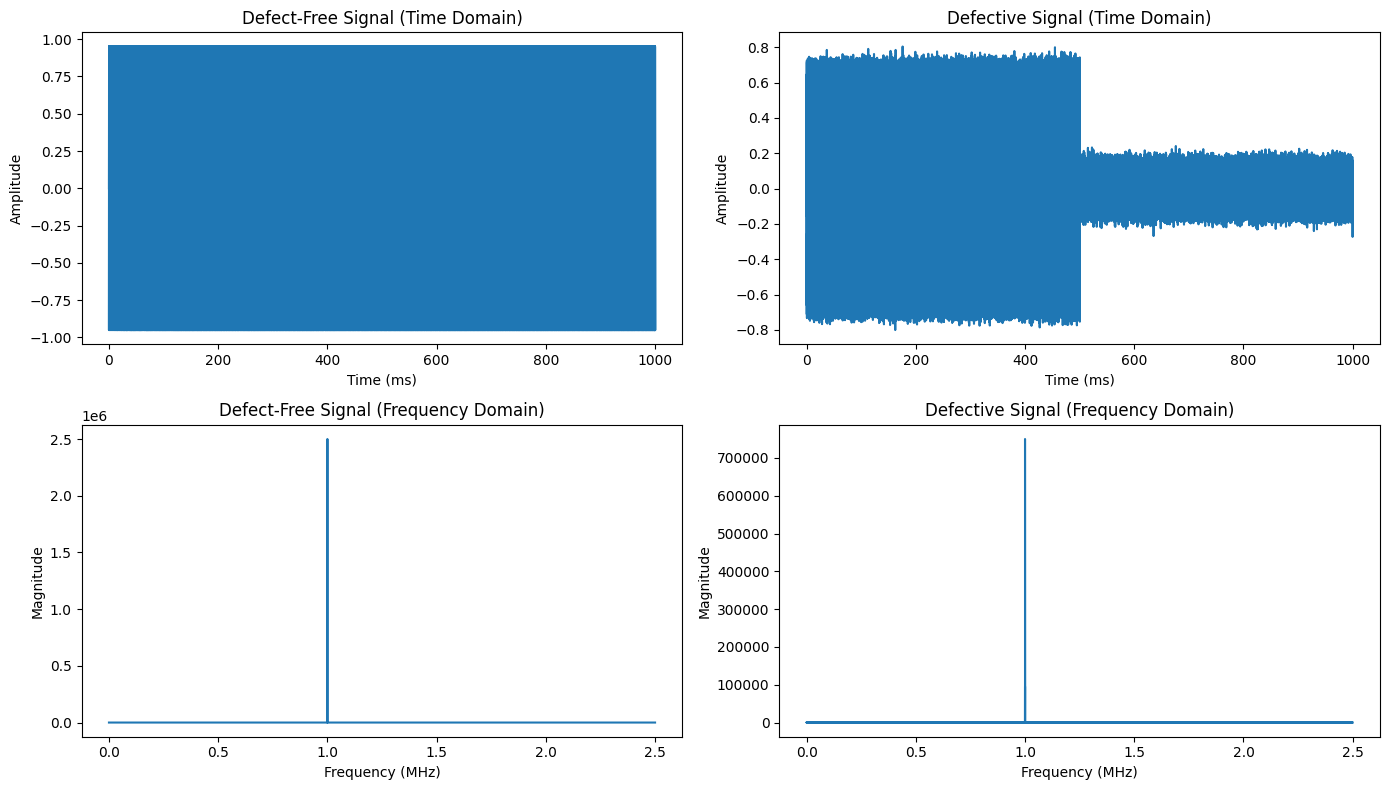

Defect-Free Signal Features:
{'Max Amplitude': 0.9510565167701337, 'RMS': 0.7071067811865458, 'Dominant Frequency': 1000000.0, 'Mean': 1.2429623774679044e-15, 'Variance': 0.49999999999999756, 'Skewness': -3.83770590297425e-15, 'Kurtosis': -1.4999999999999896}

Defective Signal Features:
{'Max Amplitude': 0.8041830117569915, 'RMS': 0.3041819620784543, 'Dominant Frequency': 1000000.0, 'Mean': 3.302380791181141e-05, 'Variance': 0.09252666496332634, 'Skewness': -6.262069603807766e-05, 'Kurtosis': -0.00016871562967768483}


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.stats import skew, kurtosis

# Simulate signals
sampling_rate = 5e6  # 5 MHz sampling rate
duration = 1  # 1 second
t = np.arange(0, duration, 1/sampling_rate)

# Defect-free signal (a simple sine wave pulse)
frequency = 1e6  # 1 MHz frequency
pulse = np.sin(2 * np.pi * frequency * t)

# Defective signal (echo with noise)
echo_delay = int(0.0004 * sampling_rate)  # Delay of 0.4 ms
echo_amplitude = 0.6  # Attenuated echo
echo_signal = np.zeros_like(t)
echo_signal[echo_delay:echo_delay+len(pulse)//2] = echo_amplitude * pulse[:len(pulse)//2]

# Add noise to the defective signal
noise = 0.05 * np.random.normal(size=t.shape)
received_signal = echo_signal + noise

# Feature extraction function
def extract_features(signal, sampling_rate):
    # Time-domain features
    max_amplitude = np.max(np.abs(signal))
    rms_value = np.sqrt(np.mean(signal**2))
    
    # FFT for frequency-domain features
    N = len(signal)
    fft_result = fft(signal)
    freqs = np.fft.fftfreq(N, 1/sampling_rate)
    fft_magnitude = np.abs(fft_result)
    
    # Dominant frequency
    dominant_freq = freqs[np.argmax(fft_magnitude[:N//2])]
    
    # Statistical features
    mean_val = np.mean(signal)
    variance_val = np.var(signal)
    skewness_val = skew(signal)
    kurtosis_val = kurtosis(signal)
    
    return {
        'Max Amplitude': max_amplitude,
        'RMS': rms_value,
        'Dominant Frequency': dominant_freq,
        'Mean': mean_val,
        'Variance': variance_val,
        'Skewness': skewness_val,
        'Kurtosis': kurtosis_val
    }

# Extract features from both defect-free and defective signals
defect_free_features = extract_features(pulse, sampling_rate)
defective_features = extract_features(received_signal, sampling_rate)

# Plotting the time-domain signals
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(t * 1e3, pulse)
plt.title('Defect-Free Signal (Time Domain)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t * 1e3, received_signal)
plt.title('Defective Signal (Time Domain)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plotting the frequency-domain signals using FFT
N = len(pulse)
pulse_fft = np.abs(fft(pulse))
received_fft = np.abs(fft(received_signal))
freqs = np.fft.fftfreq(N, 1/sampling_rate)

plt.subplot(2, 2, 3)
plt.plot(freqs[:N//2] * 1e-6, pulse_fft[:N//2])
plt.title('Defect-Free Signal (Frequency Domain)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 4)
plt.plot(freqs[:N//2] * 1e-6, received_fft[:N//2])
plt.title('Defective Signal (Frequency Domain)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Print extracted features
print("Defect-Free Signal Features:")
print(defect_free_features)
print("\nDefective Signal Features:")
print(defective_features)


In [10]:
import pandas as pd

# Create a dataset with features from both signals
features = ['Max Amplitude', 'RMS', 'Dominant Frequency', 'Mean', 'Variance', 'Skewness', 'Kurtosis']
data = [list(defect_free_features.values()), list(defective_features.values())]

# Labels: 0 for defect-free, 1 for defective
labels = [0, 1]

# Create a DataFrame
df = pd.DataFrame(data, columns=features)
df['Label'] = labels

print(df)


   Max Amplitude       RMS  Dominant Frequency          Mean  Variance  \
0       0.951057  0.707107           1000000.0  3.992806e-16  0.500000   
1       0.767633  0.304314           1000000.0 -2.664242e-04  0.092607   

       Skewness  Kurtosis  Label  
0 -2.015622e-15 -1.500000      0  
1  8.250635e-03  0.020866      1  


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Prepare data for the model
X = df[features].values  # Feature columns
y = df['Label'].values   # Target label

# One-hot encode the labels (if there are more than two classes)
num_classes = len(np.unique(y))  # Number of unique labels
y_categorical = to_categorical(y, num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Neural Network
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons in the first layer

# Hidden layers
model.add(Dense(32, activation='relu'))  # 32 neurons in the second layer
model.add(Dense(16, activation='relu'))  # 16 neurons in the third layer

# Output layer
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

# Step 4: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Predict labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy using sklearn
accuracy_sklearn = accuracy_score(y_test_labels, y_pred_labels)
print(f"Model Accuracy (Sklearn): {accuracy_sklearn * 100:.2f}%")


Epoch 1/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 3.5867e-04 - val_accuracy: 1.0000
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 1.7580e-04 - accuracy: 1.0000 - val_loss: 7.2034e-05 - val_accuracy: 1.0000
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 4.9821e-05 - accuracy: 1.0000 - val_loss: 3.1495e-05 - val_accuracy: 1.0000
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 2.3629e-05 - accuracy: 1.0000 - val_loss: 1.5840e-05 - val_accuracy: 1.0000
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 1.3068e-05 - accuracy: 1.0000 - val_loss: 9.7098e-06 - val_accuracy: 1.0000
Epoch 6/50
500/500 [==============================] - 1s 1ms/step - loss: 7.9802e-06 - accuracy: 1.0000 - val_loss: 6.2619e-06 - val_accuracy: 1.0000
Epoch 7/50
500/500 [==============================] - 1s 1ms/step - loss: 5.1628e-06 - accuracy: 1.0000 

In [14]:
# Simulate new defect-free and defective signals (same as stage 1)
# Then extract features and predict using the trained model

new_signal = received_signal  # Replace with a new signal
new_features = extract_features(new_signal, sampling_rate)
new_data = pd.DataFrame([list(new_features.values())], columns=features)

# Predict if the new signal is defect-free or defective
new_prediction = model.predict(new_data)
print("Prediction:", "Defective" if new_prediction[0] == 1 else "Defect-Free")


1/1 [==============================] - 0s 56ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
import pandas as pd
import numpy as np

# Number of samples you want to generate for each class (defect-free and defective)
num_samples = 10000

# Function to simulate random feature values for defect-free and defective signals
def simulate_features(defective=False):
    if defective:
        # Generate features for defective signals
        max_amplitude = np.random.uniform(0.6, 1.0)
        rms = np.random.uniform(0.2, 0.6)
        dominant_frequency = np.random.uniform(950, 1050)  # Peak around 1000 Hz with variation
        mean = np.random.uniform(0, 0.1)
        variance = np.random.uniform(0.4, 0.6)
        skewness = np.random.uniform(0.1, 0.5)
        kurtosis = np.random.uniform(3, 5)
    else:
        # Generate features for defect-free signals
        max_amplitude = np.random.uniform(0.8, 1.0)
        rms = np.random.uniform(0.6, 0.8)
        dominant_frequency = np.random.uniform(995, 1005)  # Close to 1000 Hz
        mean = np.random.uniform(-0.1, 0.1)
        variance = np.random.uniform(0.2, 0.3)
        skewness = np.random.uniform(0.0, 0.2)
        kurtosis = np.random.uniform(2.5, 3.5)
    
    return {
        'Max Amplitude': max_amplitude,
        'RMS': rms,
        'Dominant Frequency': dominant_frequency,
        'Mean': mean,
        'Variance': variance,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }

# Create lists to store the generated data
data = []
labels = []

# Generate defect-free samples
for _ in range(num_samples):
    features = simulate_features(defective=False)
    data.append(list(features.values()))
    labels.append(0)  # 0 for defect-free

# Generate defective samples
for _ in range(num_samples):
    features = simulate_features(defective=True)
    data.append(list(features.values()))
    labels.append(1)  # 1 for defective

# Create the DataFrame
features = ['Max Amplitude', 'RMS', 'Dominant Frequency', 'Mean', 'Variance', 'Skewness', 'Kurtosis']
df = pd.DataFrame(data, columns=features)
df['Label'] = labels

# Shuffle the dataset to mix defect-free and defective samples
df = df.sample(frac=1).reset_index(drop=True)

# Display first few rows of the large dataset
print(df.head())
print(f"Total samples: {len(df)}")


   Max Amplitude       RMS  Dominant Frequency      Mean  Variance  Skewness  \
0       0.829553  0.767481          998.343972 -0.041005  0.282817  0.090881   
1       0.956641  0.474033         1048.750554  0.060992  0.574850  0.105647   
2       0.846463  0.716983          996.099364  0.018866  0.227483  0.155055   
3       0.985667  0.538028         1032.159981  0.064815  0.519560  0.209441   
4       0.663209  0.364713         1025.191843  0.042797  0.435196  0.248665   

   Kurtosis  Label  
0  3.088766      0  
1  4.420434      1  
2  3.091398      0  
3  4.818228      1  
4  3.813447      1  
Total samples: 20000


Defect-Free Signal Features:
{'Max Amplitude': 0.9510565162955882, 'RMS': 0.7071067811865468, 'Dominant Frequency': 1000000.0, 'Mean': 3.992806085761913e-16, 'Variance': 0.499999999999999, 'Skewness': -2.015621894759889e-15, 'Kurtosis': -1.5000000000000089}

Defective Signal Features:
{'Max Amplitude': 0.7257509815718132, 'RMS': 0.304222627881919, 'Dominant Frequency': 1000000.0, 'Mean': 0.0006762907995211371, 'Variance': 0.09255094994613504, 'Skewness': -0.0008694887750690229, 'Kurtosis': 0.004637245746841323}


NameError: name 'freqs' is not defined

<Figure size 1000x600 with 0 Axes>